# tsam - Regmentation
Example usage of the time series aggregation module (tsam)
Date: 29.04.2019

Author: Maximilian Hoffmann

Import pandas and the relevant time series aggregation class

In [1]:
%load_ext autoreload
%autoreload 2
import copy
import os
import pandas as pd
import matplotlib.pyplot as plt
import tsam.timeseriesaggregation as tsam
%matplotlib inline

### Input data 

Read in time series from testdata.csv with pandas

In [2]:
raw = pd.read_csv('testdata.csv', index_col = 0)

Create a plot function for the temperature for a visual comparison of the time series

In [3]:
def plotTS(data, periodlength, vmin, vmax, label = 'T [°C]'):
    fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
    stacked, timeindex = tsam.unstackToPeriods(copy.deepcopy(data), periodlength)
    cax = axes.imshow(stacked.values.T, interpolation = 'nearest', vmin = vmin, vmax = vmax)
    axes.set_aspect('auto')  
    axes.set_ylabel('Hour')
    plt.xlabel('Day')

    fig.subplots_adjust(right = 1.2)
    cbar=plt.colorbar(cax)    
    cbar.set_label(label)

### Hierarchical aggregation with medoid representation at hourly resolution

Initialize an aggregation class object with hierarchical as method for eight typical days

In [4]:
aggregationMedoid = tsam.TimeSeriesAggregation(raw, noTypicalPeriods = 8, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical')

Create the typical periods

In [5]:
typPeriodsMedoid = aggregationMedoid.createTypicalPeriods()

Predict original data

In [6]:
predictedPeriodsMedoid = aggregationMedoid.predictOriginalData()

Get accuracy indicators

In [7]:
aggregationMedoid.accuracyIndicators()

,RMSE,RMSE_duration,MAE
GHI,0.094709,0.030927,0.050724
Load,0.101172,0.031669,0.071986
T,0.089186,0.034249,0.069773
Wind,0.144894,0.049622,0.113727


### Hierarchical aggregation with mean representation and 10 typical days at hourly resolution

In [8]:
aggregationMean = tsam.TimeSeriesAggregation(raw, noTypicalPeriods = 20, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical', representationMethod='meanRepresentation')

Create the typical periods

In [9]:
typPeriodsMean = aggregationMean.createTypicalPeriods()

Predict original data

In [10]:
predictedPeriodsMean = aggregationMean.predictOriginalData()

Get accuracy indicators

In [11]:
aggregationMean.accuracyIndicators()

,RMSE,RMSE_duration,MAE
GHI,0.072693,0.019636,0.037938
Load,0.064350,0.015139,0.045835
T,0.069056,0.020487,0.054453
Wind,0.107620,0.049146,0.083569


### Hierarchical aggregation with minmax representation and 10 typical days at hourly resolution

In [12]:
aggregationMinmax = tsam.TimeSeriesAggregation(raw, noTypicalPeriods = 20, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical',
                                        representationMethod='minmaxRepresentation',
                                        rescaleClusterPeriods=False)

Create the typical periods

In [13]:
typPeriodsMinmax = aggregationMinmax.createTypicalPeriods()

Predict original data

In [14]:
predictedPeriodsMinmax = aggregationMinmax.predictOriginalData()

Get accuracy indicators

In [15]:
aggregationMinmax.accuracyIndicators()

,RMSE,RMSE_duration,MAE
GHI,0.168564,0.143625,0.097259
Load,0.144795,0.113654,0.112219
T,0.155706,0.134596,0.133953
Wind,0.264593,0.227514,0.224926


### Comparison of the aggregations 
It was shown for the temperature, but both times all four time series have been aggregated. Therefore, we compare here also the duration curves  of the electrical load for the original time series, the aggregation with k-mean, and the hierarchical aggregation including peak periods.

Text(0, 0.5, 'Duration Load [MW]')

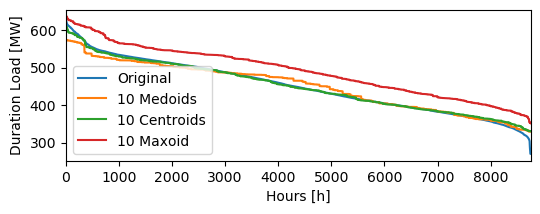

In [16]:
fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
raw['Load'].sort_values(ascending=False).reset_index(drop=True).plot(label = 'Original')
predictedPeriodsMedoid['Load'].sort_values(ascending=False).reset_index(drop=True).plot(label = '10 Medoids')
predictedPeriodsMean['Load'].sort_values(ascending=False).reset_index(drop=True).plot(label = '10 Centroids')
predictedPeriodsMinmax['Load'].sort_values(ascending=False).reset_index(drop=True).plot(label = '10 Maxoid')
plt.legend()
plt.xlabel('Hours [h]')
plt.ylabel('Duration Load [MW]')

In [17]:
param = 'GHI'

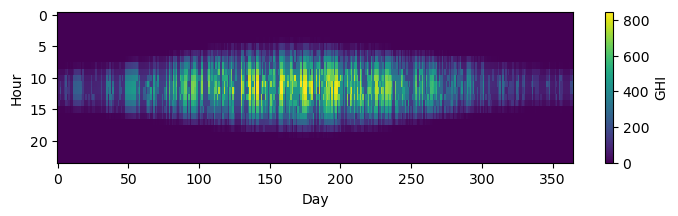

In [18]:
plotTS(raw[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param)

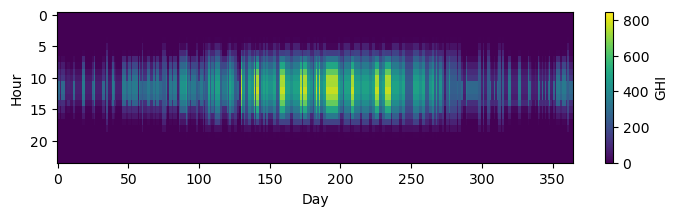

In [19]:
plotTS(predictedPeriodsMedoid[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param)

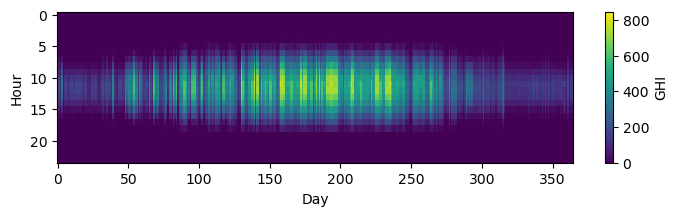

In [20]:
plotTS(predictedPeriodsMean[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param)

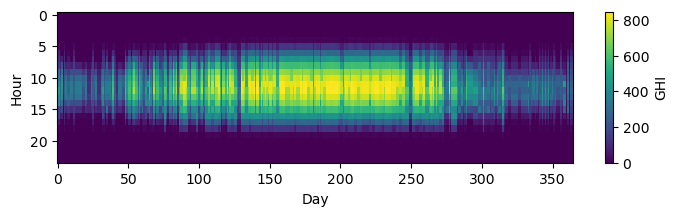

In [21]:
plotTS(predictedPeriodsMinmax[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param)

Text(0, 0.5, 'Load [MW]')

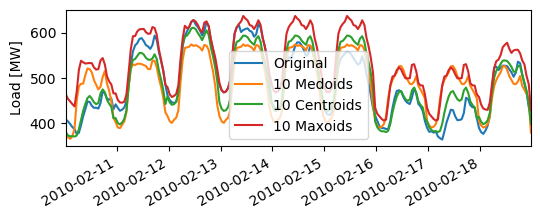

In [22]:
fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
raw['Load']['20100210':'20100218'].plot(label = 'Original')
predictedPeriodsMedoid['Load']['20100210':'20100218'].plot(label = '10 Medoids')
predictedPeriodsMean['Load']['20100210':'20100218'].plot(label = '10 Centroids')
predictedPeriodsMinmax['Load']['20100210':'20100218'].plot(label = '10 Maxoids')
plt.legend()
plt.ylabel('Load [MW]')

### Validation

Check that the means of the original time series and the predicted ones are the same.

In [23]:
raw.mean()

GHI     110.990183
Load    450.260335
T         7.790616
Wind      3.057306
dtype: float64

In [24]:
predictedPeriodsMedoid.mean()

GHI     110.990183
Load    450.260335
T         7.790616
Wind      3.057306
dtype: float64

In [25]:
predictedPeriodsMean.mean()

GHI     110.990183
Load    450.260335
T         7.790616
Wind      3.057306
dtype: float64

In [26]:
predictedPeriodsMinmax.mean()

GHI     193.174201
Load    491.386678
T        12.934406
Wind      5.756416
dtype: float64